# Import libraries

In [1]:
import pandas as pd
import os
import random
from skimage import io
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style = "dark", 
        color_codes = True,
        font_scale = 1.5)

# Loading image dataset

In [2]:
def read_image_data(data_path, subset=False):

    folders = sorted(os.listdir(data_path))
    images, greyscale_images, labels = [], [], []
    label_dict = {}

    for label_no in range(len(folders)):
        folder = folders[label_no]
        label_dict[label_no] = folder
        # oslistdir = sorted(os.listdir(f"{data_path}/{folder}")) 
        oslistdir = sorted(os.listdir(os.path.join(os.getcwd(),data_path,folder))) 
        oslistdir = oslistdir[:10] if subset else oslistdir
        
        for image_name in oslistdir:
            # if image_name == ".DS_Store":
            #     continue

            image_path = f"{data_path}/{folders[label_no]}/{image_name}"
            
            # Convert image value into np array
            image = io.imread(image_path)
            
            # Standardise image format to RGB format, then convert the image to greyscale image
            if len(image.shape) == 2:
                image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
                greyscale_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

            elif len(image.shape) == 3:
                greyscale_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

            elif len(image.shape) == 4:
                image = cv2.cvtColor(image, cv2.COLOR_RGBA2RGB)
                greyscale_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
            
            images.append(image)
            greyscale_images.append(greyscale_image)
            labels.append(label_no)
        
        print(f"\t [{((label_no + 1)/len(folders)) * 100:.1f} %] Fetching label '{folder}'           ", end='\r')

    df = pd.DataFrame()
    df['Image_Id'] = [i for i in range(len(images))]
    df['Image'] = images

    df["Dim"] = df["Image"].apply(np.shape)
    df['width'], df['height'], df["dim"] = zip(*df.Dim)
    df['greyscale_image'] = greyscale_images
    df['Label'] = labels
    return df, label_dict

# loading the folder image data and convert into nd array
training_data, label_dict_Train = read_image_data("Training")
testing_data, label_dict_Test = read_image_data("Testing")

if label_dict_Train == label_dict_Test:
    full_image_df = pd.concat([training_data, testing_data],ignore_index=True)
full_image_df

,Image_Id,Image,Dim,width,height,dim,greyscale_image,Label
0,0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","(512, 512, 3)",512,512,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
1,1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","(512, 512, 3)",512,512,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
2,2,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","(512, 512, 3)",512,512,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
3,3,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","(512, 512, 3)",512,512,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
4,4,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","(512, 512, 3)",512,512,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
...,...,...,...,...,...,...,...,...
7018,1306,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","(512, 512, 3)",512,512,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",3
7019,1307,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","(512, 512, 3)",512,512,3,"[[0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,...",3
7020,1308,"[[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], ...","(512, 512, 3)",512,512,3,"[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...",3
7021,1309,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","(512, 512, 3)",512,512,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",3


# Data augmentation

In [3]:
# adapted from https://towardsdatascience.com/data-augmentation-compilation-with-python-and-opencv-b76b1cd500e0
def colorjitter(img, cj_type="b"):
    '''
    ### Different Color Jitter ###
    img: image
    cj_type: {b: brightness, s: saturation, c: constast}
    '''
    if cj_type == "b":
        # value = random.randint(-50, 50)
        value = np.random.choice(np.array([-50, -40, -30, 30, 40, 50]))
        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        h, s, v = cv2.split(hsv)
        if value >= 0:
            lim = 255 - value
            v[v > lim] = 255
            v[v <= lim] += value
        else:
            lim = np.absolute(value)
            v[v < lim] = 0
            v[v >= lim] -= np.absolute(value)

        final_hsv = cv2.merge((h, s, v))
        img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
        return img
    
    elif cj_type == "s":
        # value = random.randint(-50, 50)
        value = np.random.choice(np.array([-50, -40, -30, 30, 40, 50]))
        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        h, s, v = cv2.split(hsv)
        if value >= 0:
            lim = 255 - value
            s[s > lim] = 255
            s[s <= lim] += value
        else:
            lim = np.absolute(value)
            s[s < lim] = 0
            s[s >= lim] -= np.absolute(value)

        final_hsv = cv2.merge((h, s, v))
        img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
        return img
    
    elif cj_type == "c":
        brightness = 10
        contrast = random.randint(40, 100)
        dummy = np.int16(img)
        dummy = dummy * (contrast/127+1) - contrast + brightness
        dummy = np.clip(dummy, 0, 255)
        img = np.uint8(dummy)
        return img

In [4]:
# adapted from https://towardsdatascience.com/data-augmentation-compilation-with-python-and-opencv-b76b1cd500e0
def noisy(img, noise_type="gauss"):
    '''
    ### Adding Noise ###
    img: image
    noise_type: {gauss: gaussian, sp: salt & pepper}
    '''
    if noise_type == "gauss":
        image=img.copy() 
        mean=0
        st=0.7
        gauss = np.random.normal(mean,st,image.shape)
        gauss = gauss.astype('uint8')
        image = cv2.add(image,gauss)
        return image
    
    elif noise_type == "sp":
        image=img.copy() 
        prob = 0.05
        if len(image.shape) == 2:
            black = 0
            white = 255            
        else:
            colorspace = image.shape[2]
            if colorspace == 3:  # RGB
                black = np.array([0, 0, 0], dtype='uint8')
                white = np.array([255, 255, 255], dtype='uint8')
            else:  # RGBA
                black = np.array([0, 0, 0, 255], dtype='uint8')
                white = np.array([255, 255, 255, 255], dtype='uint8')
        probs = np.random.random(image.shape[:2])
        image[probs < (prob / 2)] = black
        image[probs > 1 - (prob / 2)] = white
        return image

In [5]:
# adapted from https://towardsdatascience.com/data-augmentation-compilation-with-python-and-opencv-b76b1cd500e0
def filters(img, f_type = "blur"):
    '''
    ### Filtering ###
    img: image
    f_type: {blur: blur, gaussian: gaussian, median: median}
    '''
    if f_type == "blur":
        image=img.copy()
        fsize = 9
        return cv2.blur(image,(fsize,fsize))
    
    elif f_type == "gaussian":
        image=img.copy()
        fsize = 9
        return cv2.GaussianBlur(image, (fsize, fsize), 0)
    
    elif f_type == "median":
        image=img.copy()
        fsize = 9
        return cv2.medianBlur(image, fsize)

In [6]:
# adapted from https://towardsdatascience.com/data-augmentation-compilation-with-python-and-opencv-b76b1cd500e0
def augment_image(image):
    # random noise (gaussian/salt_pepper)
    # random filter (blur/gaussian/median blur)
    # colorjitter (brightness and saturation and contrast)
    filter_type = ["blur", "gaussian", "median"]
    noise_type = ["gauss", "sp"]
    color_jitter_type = ["b","s","c"]
    image = filters(image, f_type = random.choice(filter_type))
    image = noisy(image, noise_type=random.choice(noise_type))
    for cj_type in color_jitter_type:
        image = colorjitter(image, cj_type)
    return image

In [7]:
# create augmented dataset (3000 instances)
from skimage.color import rgb2gray

no_of_rows = full_image_df.shape[0]
img_indexes = random.sample(range(no_of_rows), 3000)
img_indexes.sort()
augment_df = full_image_df.iloc[img_indexes]
augment_df["Image"] = augment_df["Image"].apply(augment_image)
augment_df['greyscale_image'] = augment_df['Image'].apply(rgb2gray)

augmented_df = pd.concat([full_image_df,augment_df],ignore_index=True)

C:\Users\dxlee\AppData\Local\Temp\ipykernel_2696\3901472848.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  augment_df["Image"] = augment_df["Image"].apply(augment_image)
C:\Users\dxlee\AppData\Local\Temp\ipykernel_2696\3901472848.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  augment_df['greyscale_image'] = augment_df['Image'].apply(rgb2gray)


In [8]:
augmented_df.head()

,Image_Id,Image,Dim,width,height,dim,greyscale_image,Label
0,0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","(512, 512, 3)",512,512,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
1,1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","(512, 512, 3)",512,512,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
2,2,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","(512, 512, 3)",512,512,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
3,3,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","(512, 512, 3)",512,512,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
4,4,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","(512, 512, 3)",512,512,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0


In [9]:
augmented_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10023 entries, 0 to 10022
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Image_Id         10023 non-null  int64 
 1   Image            10023 non-null  object
 2   Dim              10023 non-null  object
 3   width            10023 non-null  int64 
 4   height           10023 non-null  int64 
 5   dim              10023 non-null  int64 
 6   greyscale_image  10023 non-null  object
 7   Label            10023 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 626.6+ KB


In [10]:
augmented_df['Label'].value_counts()

2    2852
3    2523
1    2363
0    2285
Name: Label, dtype: int64

# Image preprocessing 

In [11]:
import imutils
def preprocess_brain_tumor_image(greyscale_image,plot=False):
    gray = cv2.GaussianBlur(greyscale_image, (5,5), 0) # reduce noise
    contrast = cv2.equalizeHist(gray) # enhance image contrast
    thres = cv2.threshold(contrast, 45, 255, cv2.THRESH_BINARY)[1] # white if the color intensity exceed the threshold, otherwise black
    thres =cv2.erode(thres, None, iterations = 2) # remove border of foreground object, reduce image features (can be iteratively)
    thres = cv2.dilate(thres, None, iterations = 2) # increase object area, emphasise features
    
    # cropping
    cnts = cv2.findContours(thres.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key = cv2.contourArea)
    
    extLeft = tuple(c[c[:,:,0].argmin()][0])
    extRight = tuple(c[c[:,:,0].argmax()][0])
    extTop = tuple(c[c[:,:,1].argmin()][0])
    extBot = tuple(c[c[:,:,1].argmax()][0])
    
    new_image = greyscale_image[extTop[1]:extBot[1], extLeft[0]:extRight[0]] 

    if plot:
        plt.figure()
        plt.subplot(1, 2, 1)
        plt.imshow(greyscale_image)
        
        plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        
        plt.title('Original Image')
            
        plt.subplot(1, 2, 2)
        plt.imshow(new_image)

        plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)

        plt.title('Cropped Image')
        plt.show()
    return new_image

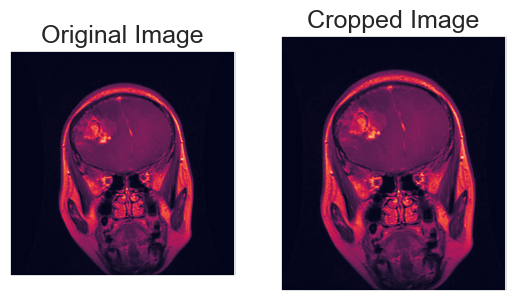

array([[1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [12]:
preprocess_brain_tumor_image(augmented_df['greyscale_image'][0],True)